### Identitas
- Nama: Christopher William
- NPM: 220711839
- Study Buddy: Scikit-Learn
- Topik Studi Kasus: Tomat 
- Arsitektur: VGG-16

In [2]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt 

data_dir = r"C:\Users\Lenovo\OneDrive\Documents\K\S 5\PMdPM\Projek-UAS-PMDPM_B_Scikit-Learn\train_data"

data = tf.keras.utils.image_dataset_from_directory(data_dir, seed = 123, image_size = (180, 180), batch_size = 16)
print(data.class_names)

class_names = data.class_names

img_size = 180
batch = 32
validation_split = 0.1
test_split = 0.1
dataset = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    seed = 123,
    image_size = (img_size, img_size),
    batch_size = batch,
)
total_count = len(dataset)
test_count = int(total_count * test_split)
val_count = int(total_count * validation_split)
train_count = total_count - val_count - test_count

print("Total Images:", total_count)
print("Train Images:", train_count)
print("Validation Images:", val_count)
print("Test Images:", test_count)

train_ds = dataset.take(train_count)
temp_ds = dataset.skip(train_count)
val_ds = temp_ds.take(val_count)
test_ds = temp_ds.skip(val_count)

Found 300 files belonging to 3 classes.
['Matang', 'Mentah', 'Setengah Matang']
Found 300 files belonging to 3 classes.
Total Images: 10
Train Images: 8
Validation Images: 1
Test Images: 1


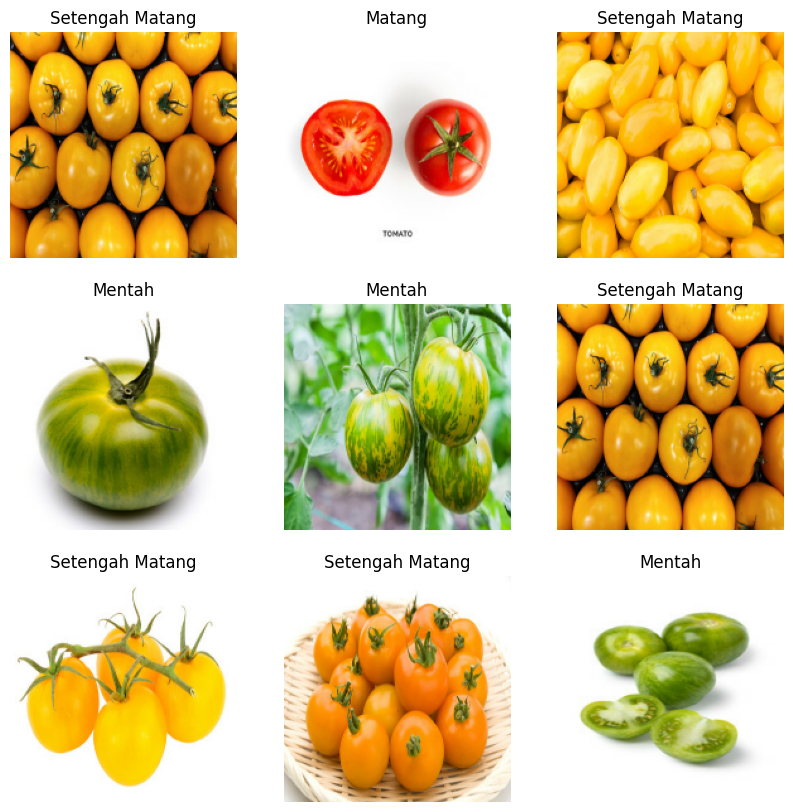

In [3]:
import matplotlib.pyplot as plt

i = 0
plt.figure(figsize=(10,10))


for images, labels in train_ds.take(1):
    for i in range(9):
        plt.subplot(3,3, i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(class_names[labels[i]])
        plt.axis('off')

In [4]:
for images, labels in train_ds.take(1):
    images_array = np.array(images)
    print(images_array.shape)

(32, 180, 180, 3)


d:\Anaconda\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


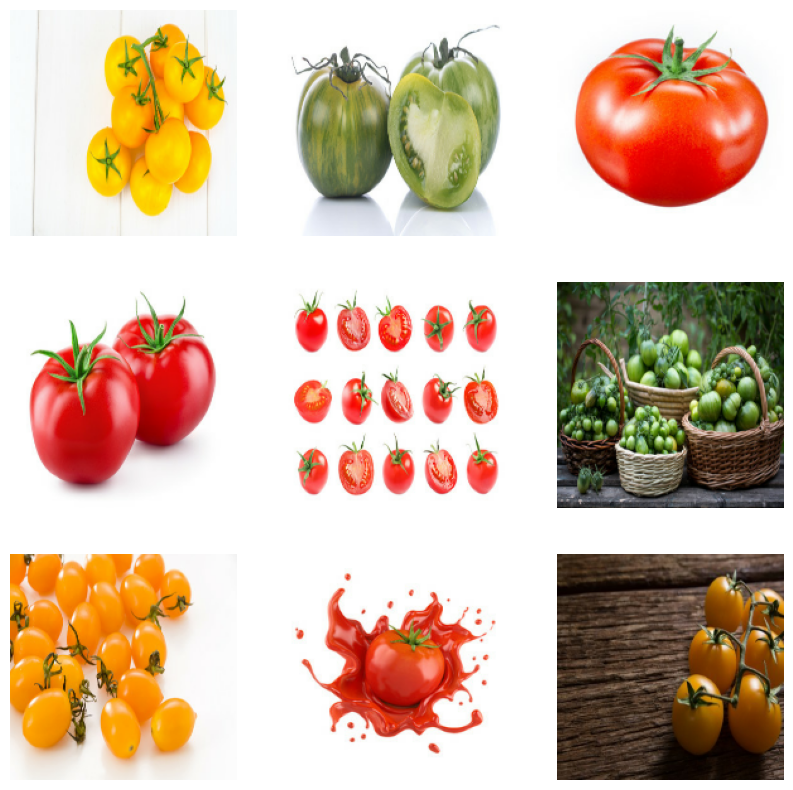

In [5]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, load_model

Tuner = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = Tuner)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = Tuner)

data_augmentation = Sequential([
    layers.RandomFlip("horizontal", input_shape = (img_size,img_size,3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
])

i = 0
plt.figure(figsize=(10,10))

#tampilkan untuk memastikan data sudah di load
for images, labels in train_ds.take(1):
    for i in range(9):
        augmented_image = data_augmentation(images[i:i+1])
        plt.subplot(3,3, i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.axis('off')

In [6]:
import tensorflow as tf
import keras

import keras._tf_keras.keras.backend as K
from keras._tf_keras.keras.models import Model
from keras._tf_keras.keras.layers import Input, Dense, Conv2D
from keras._tf_keras.keras.layers import Flatten, MaxPool2D, AvgPool2D
from keras._tf_keras.keras.layers import Concatenate, Dropout

from keras._tf_keras.keras.models import load_model

#membuat model from scratch 
def vgg16(input_shape, n_classes):
    model = Sequential()

    # Block 1
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=input_shape))
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(MaxPool2D((2, 2), strides=(2, 2)))

    # Block 2
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(MaxPool2D((2, 2), strides=(2, 2)))

    # Block 3
    model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(MaxPool2D((2, 2), strides=(2, 2)))

    # Block 4
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(MaxPool2D((2, 2), strides=(2, 2)))

    # Block 5
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(MaxPool2D((2, 2), strides=(2, 2)))

    # Fully connected layers
    model.add(Flatten())
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(n_classes, activation='softmax'))

    return model

input_shape = (180, 180, 3)
n_classes = 3

K.clear_session()

model = vgg16(input_shape, n_classes)

model.summary()

d:\Anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 180, 180, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 180, 180, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 90, 90, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 90, 90, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 90, 90, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 45, 45, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 45, 45, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 45, 45, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 45, 45, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 22, 22, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 22, 22, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 22, 22, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 22, 22, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 11, 11, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 11, 11, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 11, 11, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 11, 11, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 5, 5, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4096)           │    52,432,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │        12,291 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 83,941,187 (320.21 MB)

 Trainable params: 83,941,187 (320.21 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

model.compile(
    optimizer=Adam(learning_rate=1e-4), 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

early_stopping = EarlyStopping(
    monitor='val_accuracy', 
    patience=5, 
    mode='max'
)

history = model.fit(
    train_ds, 
    epochs=30, 
    validation_data=val_ds, 
    callbacks=[early_stopping]
)

Epoch 1/30


8/8 ━━━━━━━━━━━━━━━━━━━━ 60s 7s/step - accuracy: 0.3914 - loss: 1.3006 - val_accuracy: 0.3438 - val_loss: 1.0844
Epoch 2/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 54s 7s/step - accuracy: 0.4859 - loss: 1.0530 - val_accuracy: 0.8750 - val_loss: 0.4852
Epoch 3/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 53s 7s/step - accuracy: 0.6186 - loss: 0.8313 - val_accuracy: 0.8750 - val_loss: 0.3795
Epoch 4/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 54s 7s/step - accuracy: 0.7998 - loss: 0.5131 - val_accuracy: 0.9375 - val_loss: 0.0907
Epoch 5/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 54s 7s/step - accuracy: 0.9022 - loss: 0.2972 - val_accuracy: 1.0000 - val_loss: 0.0331
Epoch 6/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 55s 7s/step - accuracy: 0.9542 - loss: 0.1472 - val_accuracy: 0.9375 - val_loss: 0.0832
Epoch 7/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 58s 7s/step - accuracy: 0.9763 - loss: 0.1340 - val_accuracy: 1.0000 - val_loss: 0.0281
Epoch 8/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 58s 7s/step - accuracy: 0.9703 - loss: 0.0814 - val_accuracy: 1.0000 - val_loss: 0.0030
Epoch 9/30
8/8 ━━━━

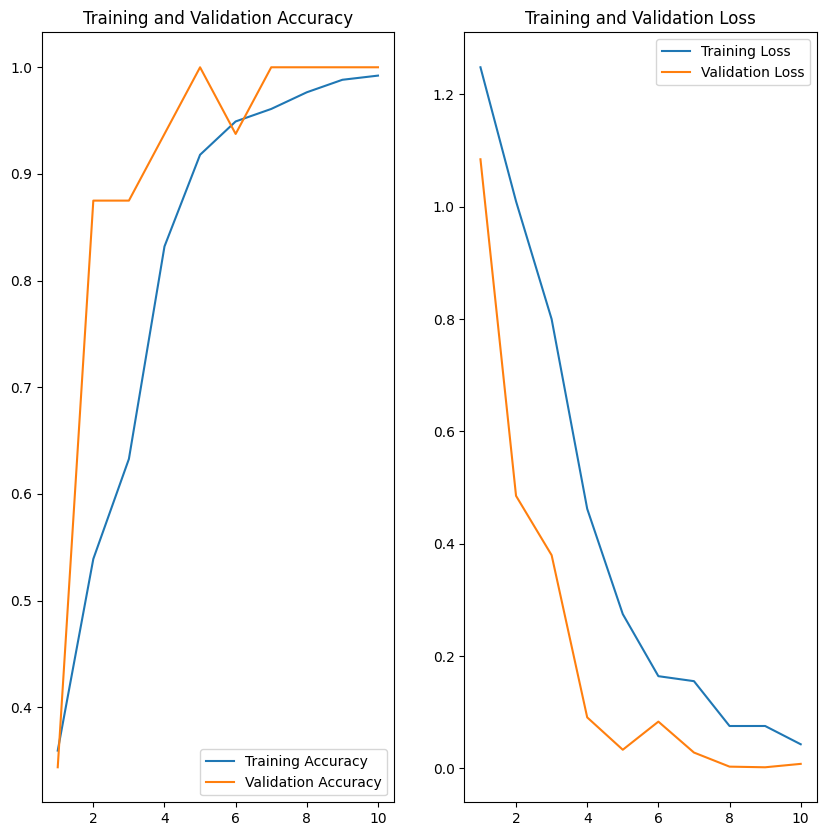

In [8]:
epochs_range = range(1, len(history.history['loss']) + 1)

plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, history.history['accuracy'], label='Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, history.history['loss'], label='Training Loss')
plt.plot(epochs_range, history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [12]:
model.save('BestModel_VGG-16_Scikit-Learn.h5')

In [10]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from PIL import Image

# Load the trained model
model = load_model(r'C:\Users\Lenovo\OneDrive\Documents\K\S 5\PMdPM\Projek-UAS-PMDPM_B_Scikit-Learn\BestModel_VGG-16_Scikit-Learn.h5')
class_names = ['Matang', 'Mentah', 'Setengah Matang']

# Function to classify images and save the original image
def classify_images(image_path, save_path='predicted_image.jpg'):
    try:
        # Load and preprocess the image
        input_image = tf.keras.utils.load_img(image_path, target_size=(180, 180))
        input_image_array = tf.keras.utils.img_to_array(input_image)
        input_image_exp_dim = tf.expand_dims(input_image_array, 0)  # Add batch dimension

        # Predict
        predictions = model.predict(input_image_exp_dim)
        result = tf.nn.softmax(predictions[0])
        class_idx = np.argmax(result)
        confidence = np.max(result) * 100

        # Display prediction and confidence in notebook
        print(f"Prediksi: {class_names[class_idx]}")
        print(f"Confidence: {confidence:.2f}%")

        # Save the original image (without text)
        input_image = Image.open(image_path)
        input_image.save(save_path)

        return f"Prediksi: {class_names[class_idx]} dengan confidence {confidence:.2f}%. Gambar asli disimpan di {save_path}."
    except Exception as e:
        return f"Terjadi kesalahan: {e}"

# Contoh penggunaan fungsi
result = classify_images(r"C:\Users\Lenovo\OneDrive\Documents\K\S 5\PMdPM\foto\test_data\Setengah Matang\kuning-test-4.jpg")
print(result)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step
Prediksi: Setengah Matang
Confidence: 57.61%
Prediksi: Setengah Matang dengan confidence 57.61%. Gambar asli disimpan di predicted_image.jpg.


Found 30 files belonging to 3 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


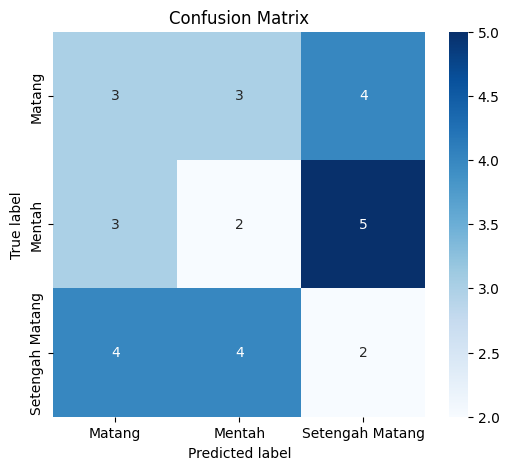

Confusion Matrix:
 [[3 3 4]
 [3 2 5]
 [4 4 2]]
Akurasi: 0.23333333333333334
Presisi: [0.3        0.22222222 0.18181818]
Recall: [0.3 0.2 0.2]
F1 Score: [0.3        0.21052632 0.19047619]


In [11]:
import tensorflow as tf
from tensorflow.keras.models import load_model
import seaborn as sns
import matplotlib.pyplot as plt


test_data = tf.keras.preprocessing.image_dataset_from_directory(
    r'C:\Users\Lenovo\OneDrive\Documents\K\S 5\PMdPM\foto\test_data',
    labels='inferred',
    label_mode='categorical',
    batch_size=32,
    image_size=(180, 180)
)

# Prediksi model
y_pred = model.predict(test_data)
y_pred_class = tf.argmax(y_pred, axis=1)

true_labels = []
for _, labels in test_data:
    true_labels.extend(tf.argmax(labels, axis=1).numpy())
true_labels = tf.convert_to_tensor(true_labels)

conf_mat = tf.math.confusion_matrix(true_labels, y_pred_class, num_classes=3)

accuracy = tf.reduce_sum(tf.linalg.diag_part(conf_mat)) / tf.reduce_sum(conf_mat)

precision = tf.linalg.diag_part(conf_mat) / tf.reduce_sum(conf_mat, axis=0)
recall = tf.linalg.diag_part(conf_mat) / tf.reduce_sum(conf_mat, axis=1)

f1_score = 2 * (precision * recall) / (precision + recall)

plt.figure(figsize=(6, 5))
sns.heatmap(conf_mat.numpy(), annot=True, fmt='d', cmap='Blues', 
            xticklabels=["Matang", "Mentah", "Setengah Matang"], yticklabels=["Matang", "Mentah", "Setengah Matang"])
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

print("Confusion Matrix:\n", conf_mat.numpy())
print("Akurasi:", accuracy.numpy())
print("Presisi:", precision.numpy())
print("Recall:", recall.numpy())
print("F1 Score:", f1_score.numpy())
